# 2021년 1월부터 2021년 5월까지 지역별 강수 비율 분석

## 라이브러리 임포트 및 데이터 로드

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import seaborn as sns

## 한글폰트 확인

In [22]:
# 한글폰트를 설정합니다.
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [23]:
# 레티나 디스플레이로 폰트가 선명하게 표시되도록 합니다.

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## 데이터 로드

In [24]:
df_202101 = pd.read_csv("강수_비율_2021년_01월.csv")
df_202102 = pd.read_csv("강수_비율_2021년_02월.csv")
df_202103 = pd.read_csv("강수_비율_2021년_03월.csv")
df_202104 = pd.read_csv("강수_비율_2021년_04월.csv")
df_202105 = pd.read_csv("강수_비율_2021년_05월.csv")

In [25]:
df_202101["month"] = "1월"
df_202102["month"] = "2월"
df_202103["month"] = "3월"
df_202104["month"] = "4월"
df_202105["month"] = "5월"

In [26]:
df = pd.concat([df_202101, df_202102, df_202103, df_202104, df_202105])
df = df.reset_index()
df = df.drop('index', axis=1)
df

,sido_nm,sigun_nm,amtprcp,norm_year,shortage,month
0,서울특별시,서울특별시,15.3,20.600000,5.3,1월
1,부산광역시,부산광역시,20.3,32.400000,12.1,1월
2,부산광역시,기장군,24.4,32.000000,7.6,1월
3,대구광역시,대구광역시,11.5,21.100000,9.6,1월
4,대구광역시,달성군,11.4,22.800000,11.4,1월
...,...,...,...,...,...,...
830,경상남도,함양군,124.1,94.878455,-,5월
831,경상남도,거창군,114.5,91.371737,-,5월
832,경상남도,합천군,119.8,94.511964,-,5월
833,제주특별자치도,제주시,198.8,151.431327,-,5월


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 6 columns):
sido_nm      835 non-null object
sigun_nm     835 non-null object
amtprcp      835 non-null float64
norm_year    835 non-null float64
shortage     835 non-null object
month        835 non-null object
dtypes: float64(2), object(4)
memory usage: 39.3+ KB


## 5개월동안의 지역별 강수량

In [37]:
df_sido = df.groupby("sido_nm").mean()
df_sido

,amtprcp,norm_year
sido_nm,,
강원도,89.891111,51.830683
경기도,86.748387,46.140423
경상남도,83.874444,75.491626
경상북도,74.089565,54.411095
광주광역시,78.020000,63.710106
대구광역시,65.510000,51.752966
대전광역시,69.000000,54.823451
부산광역시,109.820000,85.637225
서울특별시,86.640000,45.655969


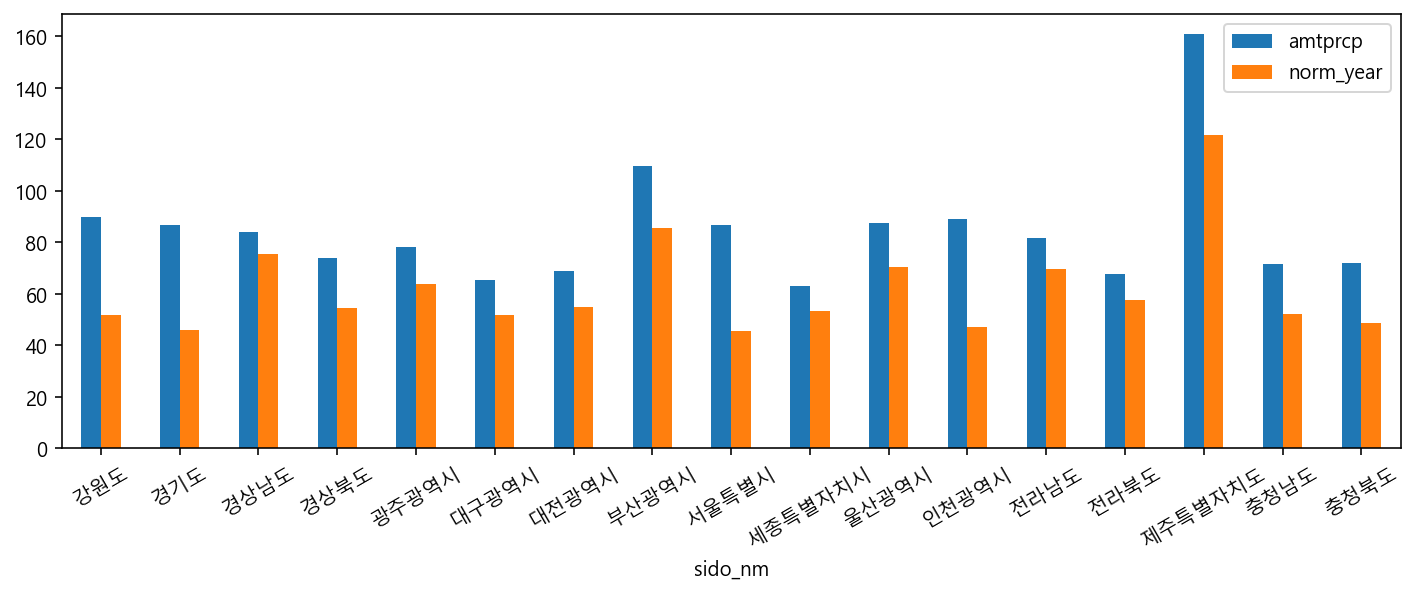

In [39]:
df_sido.plot.bar(figsize=(12,4), rot=30)

## 관측소별 강수

In [28]:
df_seoul = df[df['sigun_nm']=="서울특별시"][["amtprcp", "norm_year", "month"]]
df_seoul

,amtprcp,norm_year,month
0,15.3,20.600000,1월
167,63.5,20.884232,2월
334,94.8,30.520657,3월
501,108.9,64.597717,4월
668,150.7,91.677241,5월


In [29]:
df_seoul = df_seoul.set_index('month')
df_seoul

,amtprcp,norm_year
month,,
1월,15.3,20.600000
2월,63.5,20.884232
3월,94.8,30.520657
4월,108.9,64.597717
5월,150.7,91.677241


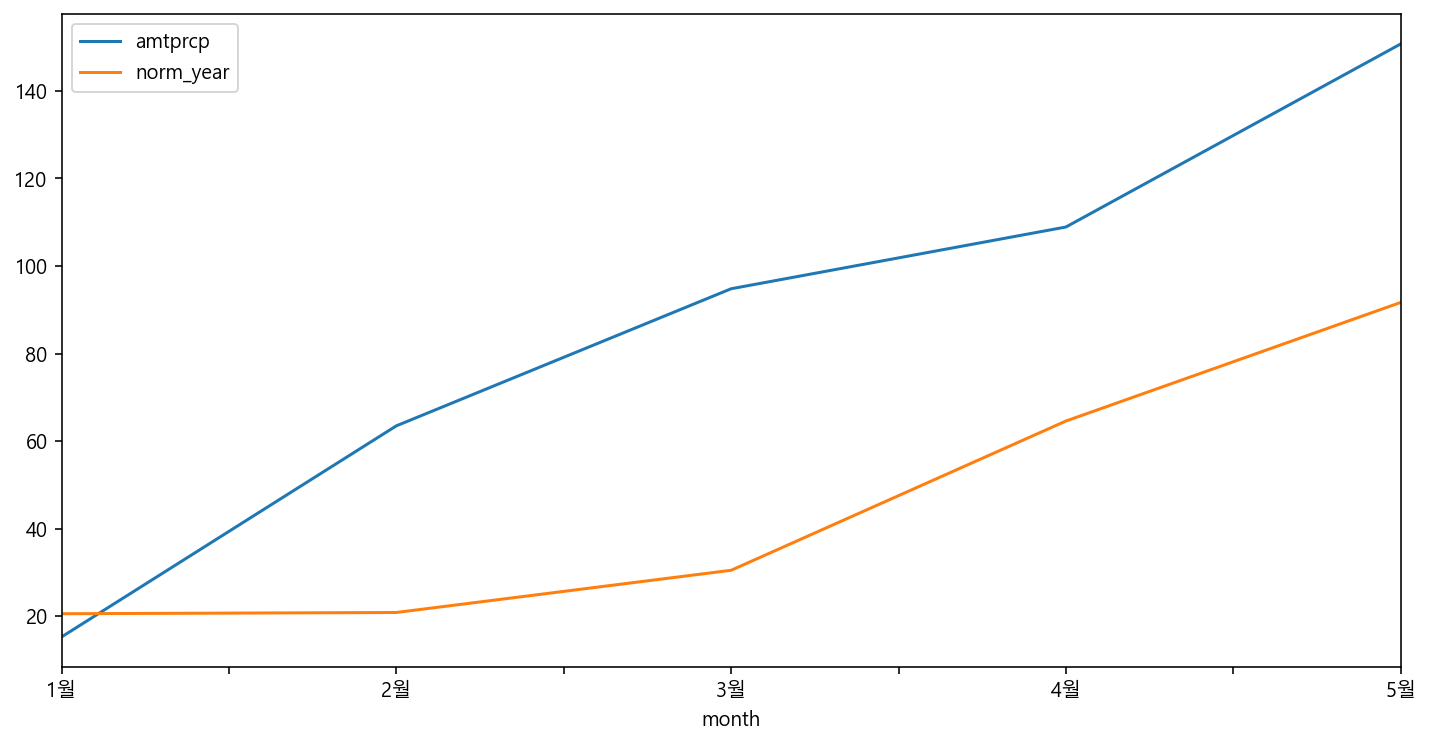

In [30]:
df_seoul.plot(figsize=(12, 6))

## 시도별 강수량

In [31]:
df_sido2 = df.groupby(["sido_nm", "month"]).mean()
df_sido2

amtprcp  norm_year
sido_nm month                       
강원도     1월       8.233333  27.655556
        2월      64.138889  28.368452
        3월     100.766667  40.156131
        4월     108.377778  73.562222
        5월     167.938889  89.411052
...                   ...        ...
충청북도    1월      12.400000  23.036364
        2월      58.163636  26.495127
        3월      81.818182  41.012498
        4월      60.236364  71.652754
        5월     147.072727  82.072972

[85 rows x 2 columns]

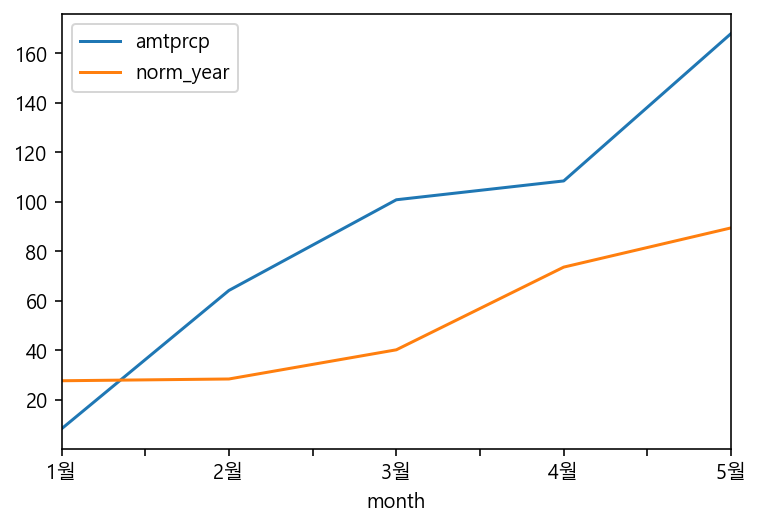

In [32]:
df_sido2.loc["강원도"].plot()